# Exercise 1 Objective:

Use the large MNIST dataset and apply PCA to measure the impact on model training time and model performance for LogisticRegression.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [31]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

X, y = mnist["data"], mnist["target"]

### Split data into 80/20 train and test sets

In [32]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

### Standardize the data to suit PCA with a center at zero

In [34]:
scaler = StandardScaler()

# Your code here
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Apply PCA to the data

In [40]:
pca = PCA(n_components=0.85)  # leave the hyperparameters default for now

# Your code here
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
pca.n_components_

153

## Build a logistic regression model with solver='lbfgs' and multi_class='auto'

In [42]:
# Your code here
model = LogisticRegression(solver='lbfgs', multi_class='auto')

## Fit the model and time it

In [43]:
%%time

model.fit(X_train, y_train)

CPU times: user 8.98 s, sys: 248 ms, total: 9.23 s
Wall time: 2.31 s


/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the performance

In [44]:
print(model.score(X_test, y_test))

0.9221428571428572


### Go back and change n_components to 0.95 and 0.85 and fill in the table below

In [47]:
# Your data here
df = pd.DataFrame(data = [[1.00, 784, 6.54, .915],
                          [0.95, 330, 3.65, .921],
                          [0.85, 153, 2.31, .922]], 
                  columns = ['Variance Retained',
                             'Number of Components',
                             'Time (seconds)',
                             'Accuracy'])

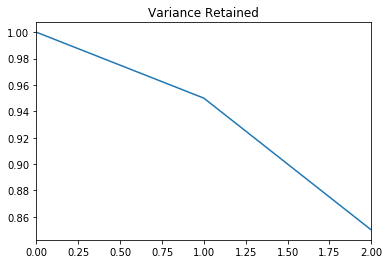

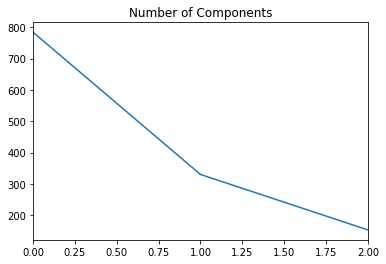

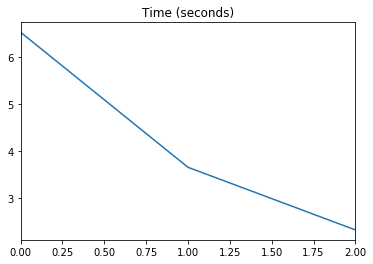

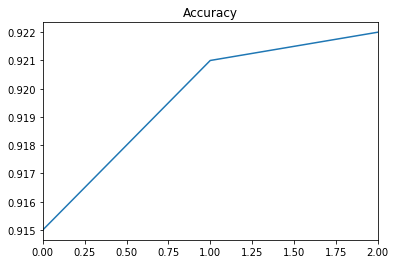

In [52]:
for col in df.columns:
    plt.figure()
    df[col].plot();
    plt.title(col)